In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
df = pd.read_html(url, header = 0)[2]

#1 Вивести перших 5 рядків
df.head(5)

,Country/Territory,IMF[1][13],IMF[1][13].1,World Bank[14],World Bank[14].1,United Nations[15],United Nations[15].1
0,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
1,World,109529216,2024,105435540,2023,100834796,2022
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022


In [ ]:
#3 Визначити оптимальну кількість стовпців.
df.columns

Index(['Country/Territory', 'IMF[1][13]', 'IMF[1][13].1', 'World Bank[14]',
       'World Bank[14].1', 'United Nations[15]', 'United Nations[15].1'],
      dtype='object')

In [ ]:
#4 Змінити назви стовпців на більш зручні
current_colums = [
    ('Country/Territory'),
    ('IMF[1][13]'),
    ('IMF[1][13].1'),
    ('World Bank[14]'),
    ('World Bank[14].1'),
    ('United Nations[15]'),
    ('United Nations[15].1')]
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UnitedNations_Estimate',
    'UnitedNations_Year'
]

df.columns = new_columns
df = df.drop(0)
df = df.drop(1)
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UnitedNations_Estimate,UnitedNations_Year
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022
5,Japan,4110452,2024,4212945,2023,4232173,2022
6,India,3937011,2024,3549919,2023,3465541,2022


In [ ]:
selected_columns={
    'IMF_Forecast':'MVF_2024',
    'WorldBank_Estimate':'WorldBank_2023',
    'UnitedNations_Estimate':'OON_2022'

}
df1= df[['Country']+list(selected_columns.keys())]
df=df1.rename(columns=selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083,27360935,25744100
3,China,18532633,17794782,17963170
4,Germany,4591100,4456081,4076923
5,Japan,4110452,4212945,4232173
6,India,3937011,3549919,3465541


In [ ]:
#2 Визначити розмір датасета.
df.shape

(209, 4)

In [ ]:
df.isnull().sum()

Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64

In [ ]:
#5. Визначити тип даних.
print("/nTипи даних кожного сTовпця:\n",df.dtypes)

/nTипи даних кожного сTовпця:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [ ]:
#6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
df.replace('—', float('nan'), inplace=True)
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')
print("\nТипи даних після конвертації:\n", df.dtypes)
df.head(5)


Типи даних після конвертації:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083.0,27360935.0,25744100.0
3,China,18532633.0,17794782.0,17963170.0
4,Germany,4591100.0,4456081.0,4076923.0
5,Japan,4110452.0,4212945.0,4232173.0
6,India,3937011.0,3549919.0,3465541.0


In [ ]:
df.isnull().sum()

Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64

In [ ]:
import numpy as np
df=df.replace({'-':np.nan})
df=df.fillna(df.mean(numeric_only=True),axis=0)
df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083.0,27360935.0,25744100.0
3,China,18532633.0,17794782.0,17963170.0
4,Germany,4591100.0,4456081.0,4076923.0
5,Japan,4110452.0,4212945.0,4232173.0
6,India,3937011.0,3549919.0,3465541.0


In [ ]:
#7. Ще раз перевірити наявність пропущених значень.
df.isnull().sum()

Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64

In [ ]:
#8. Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = df[df.duplicated()]
print("\nдублікати:\n", duplicates)


дублікати:
 Empty DataFrame
Columns: [Country, MVF_2024, WorldBank_2023, OON_2022]
Index: []


In [ ]:
#9. Вивести описову статистику датасету describe()
description = df.describe()
print(description)


           MVF_2024  WorldBank_2023      OON_2022
count  2.090000e+02    2.090000e+02  2.090000e+02
mean   5.644339e+05    5.178115e+05  4.811087e+05
std    2.435307e+06    2.325859e+06  2.236743e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.446700e+04    1.043800e+04  8.772000e+03
50%    5.631000e+04    4.320500e+04  3.171700e+04
75%    4.099890e+05    3.355330e+05  2.371010e+05
max    2.878108e+07    2.736094e+07  2.574410e+07


In [ ]:
#10.Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?
df['Deviation'] = df['MVF_2024'] - df['WorldBank_2023']
df_sorted = df.sort_values(by='Deviation', ascending=False)
print("Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:")
print(df_sorted[['Country', 'Deviation']])
df.head(5)

Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:
                      Country     Deviation
2               United States  1.420148e+06
3                       China  7.378510e+05
197  Turks and Caicos Islands  5.630319e+05
194              Sint Maarten  5.628109e+05
179                   Curaçao  5.613599e+05
..                        ...           ...
5                       Japan -1.024930e+05
55                    Nigeria -1.100770e+05
72                  Venezuela -4.154835e+05
137                     Yemen -5.008715e+05
166               South Sudan -5.112945e+05

[209 rows x 2 columns]


,Country,MVF_2024,WorldBank_2023,OON_2022,Deviation
2,United States,28781083.0,27360935.0,25744100.0,1420148.0
3,China,18532633.0,17794782.0,17963170.0,737851.0
4,Germany,4591100.0,4456081.0,4076923.0,135019.0
5,Japan,4110452.0,4212945.0,4232173.0,-102493.0
6,India,3937011.0,3549919.0,3465541.0,387092.0


In [ ]:
#11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?
# Обчислення кореляційної матриці
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("Кореляційна матриця:")
print(correlation_matrix)
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Видаляємо кореляцію змінної саму з собою

print("\nПари змінних з найвищою кореляцією:")
print(max_corr.head())
df.head(5)

Кореляційна матриця:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.998216  0.997244
WorldBank_2023  0.998216        1.000000  0.998610
OON_2022        0.997244        0.998610  1.000000

Пари змінних з найвищою кореляцією:
WorldBank_2023  OON_2022          0.998610
OON_2022        WorldBank_2023    0.998610
MVF_2024        WorldBank_2023    0.998216
WorldBank_2023  MVF_2024          0.998216
MVF_2024        OON_2022          0.997244
dtype: float64


,Country,MVF_2024,WorldBank_2023,OON_2022,Deviation
2,United States,28781083.0,27360935.0,25744100.0,1420148.0
3,China,18532633.0,17794782.0,17963170.0,737851.0
4,Germany,4591100.0,4456081.0,4076923.0,135019.0
5,Japan,4110452.0,4212945.0,4232173.0,-102493.0
6,India,3937011.0,3549919.0,3465541.0,387092.0


In [ ]:
#12.Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Середні значення для кожного стовпця:")
print(mean_values)

# Створюємо DataFrame з даними за попередні роки для порівняння
data_2023 = {
    'Country': ['World', 'United States', 'China', 'Germany', 'Japan'],
    'MVF_2023': [109529216.0, 28781083.0, 18532633.0, 4591100.0, 4110452.0],
    'WorldBank_2022': [105435540.0, 27360935.0, 17794782.0, 4456081.0, 4212945.0],
    'OON_2021': [100834796.0, 25744100.0, 17963170.0, 4076923.0, 4232173.0]
}

df_2023 = pd.DataFrame(data_2023)

# Обчислюємо середні значення для кожного стовпця в 2023 році
mean_values_2023 = df_2023[['MVF_2023', 'WorldBank_2022', 'OON_2021']].mean()
print("\nСередні значення для кожного стовпця у 2023 році:")
print(mean_values_2023)

# Порівнюємо середні значення між роками
comparison = pd.DataFrame({
    '2024': mean_values,
    '2023': mean_values_2023
})

print("\nПорівняння середніх значень між роками:")
print(comparison)


Середні значення для кожного стовпця:
MVF_2024          564433.932990
WorldBank_2023    517811.472637
OON_2022          481108.673077
dtype: float64

Середні значення для кожного стовпця у 2023 році:
MVF_2023          33108896.8
WorldBank_2022    31852056.6
OON_2021          30570232.4
dtype: float64

Порівняння середніх значень між роками:
                         2024        2023
MVF_2023                  NaN  33108896.8
MVF_2024        564433.932990         NaN
OON_2021                  NaN  30570232.4
OON_2022        481108.673077         NaN
WorldBank_2022            NaN  31852056.6
WorldBank_2023  517811.472637         NaN


In [ ]:
#13.Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?
import pandas as pd
data = {
    'Country': ['World', 'United States', 'China', 'Germany', 'Japan'],
    'MVF_2024': [109529216.0, 28781083.0, 18532633.0, 4591100.0, 4110452.0],
    'WorldBank_2023': [105435540.0, 27360935.0, 17794782.0, 4456081.0, 4212945.0],
    'OON_2022': [100834796.0, 25744100.0, 17963170.0, 4076923.0, 4232173.0]
}
df = pd.DataFrame(data)


df.set_index('Country', inplace=True)
std_devs = df.std(axis=1)

most_variable_country = std_devs.idxmax()
highest_variability = std_devs.max()

print("Стандартне відхилення для кожної країни:")
print(std_devs)

print(f"\nКраїна з найвищою варіативністю у показниках між роками: {most_variable_country}")
print(f"Максимальне стандартне відхилення: {highest_variability}")


Стандартне відхилення для кожної країни:
Country
World            4.349674e+06
United States    1.519553e+06
China            3.866667e+05
Germany          2.665736e+05
Japan            6.543512e+04
dtype: float64

Країна з найвищою варіативністю у показниках між роками: World
Максимальне стандартне відхилення: 4349673.69816235


In [ ]:
#14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).
import pandas as pd
data = {
    'Country': ['World', 'United States', 'China', 'Germany', 'Japan'],
    'MVF_2024': [109529216.0, 28781083.0, 18532633.0, 4591100.0, 4110452.0],
    'WorldBank_2023': [105435540.0, 27360935.0, 17794782.0, 4456081.0, 4212945.0],
    'OON_2022': [100834796.0, 25744100.0, 17963170.0, 4076923.0, 4232173.0]
}

df = pd.DataFrame(data)
df.set_index('Country', inplace=True)

# Знаходимо країну з найвищим і найнижчим показником для кожного року
max_values = df.idxmax()
min_values = df.idxmin()

# Створюємо DataFrame для виводу результатів
max_df = pd.DataFrame({
    'Year': df.columns,
    'Country_with_Max': max_values,
    'Max_Value': df.max()
})

min_df = pd.DataFrame({
    'Year': df.columns,
    'Country_with_Min': min_values,
    'Min_Value': df.min()
})

# Виводимо результати
print("Країна з найвищими показниками для кожного року:")
print(max_df)
print("\nКраїна з найнижчими показниками для кожного року:")
print(min_df)


Країна з найвищими показниками для кожного року:
                          Year Country_with_Max    Max_Value
MVF_2024              MVF_2024            World  109529216.0
WorldBank_2023  WorldBank_2023            World  105435540.0
OON_2022              OON_2022            World  100834796.0

Країна з найнижчими показниками для кожного року:
                          Year Country_with_Min  Min_Value
MVF_2024              MVF_2024            Japan  4110452.0
WorldBank_2023  WorldBank_2023            Japan  4212945.0
OON_2022              OON_2022          Germany  4076923.0


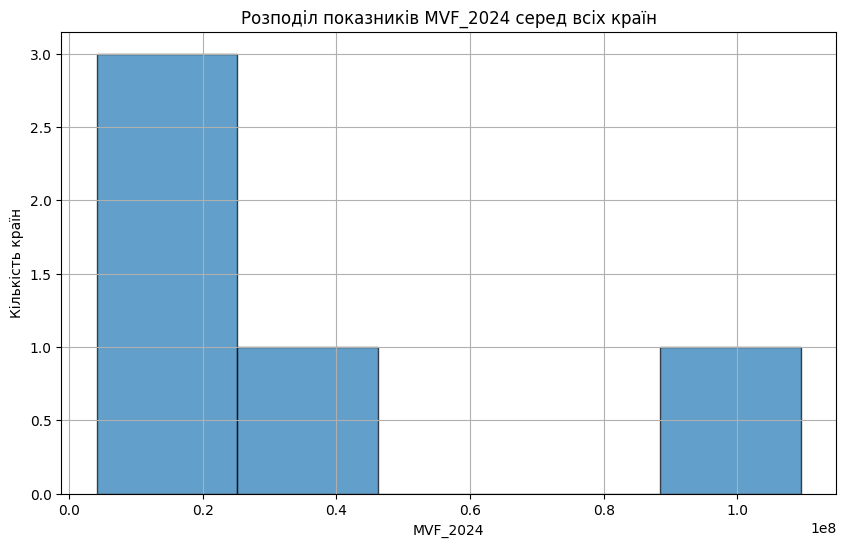

In [ ]:
#15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Country': ['World', 'United States', 'China', 'Germany', 'Japan'],
    'MVF_2024': [109529216.0, 28781083.0, 18532633.0, 4591100.0, 4110452.0],
}

df = pd.DataFrame(data)

# Побудова гістограми для показників MVF_2024
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid(True)

# Відображення гістограми
plt.show()

In [ ]:
#16.Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?
import pandas as pd

data = {
    'Country': ['World', 'United States', 'China', 'Germany', 'Japan'],
    'MVF_2024': [109529216.0, 28781083.0, 18532633.0, 4591100.0, 4110452.0],
    'WorldBank_2023': [105435540.0, 27360935.0, 17794782.0, 4456081.0, 4212945.0],
    'OON_2022': [100834796.0, 25744100.0, 17963170.0, 4076923.0, 4232173.0]
}
df = pd.DataFrame(data)
df.set_index('Country', inplace=True)
total_values = df.sum()
percentage_shares = df.divide(total_values, axis=1) * 100


print("Частка кожної країни в загальному значенні для кожного року:")
print(percentage_shares)
print("\nЗміна часток між роками:")
for column in percentage_shares.columns:
    print(f"\nЧастка для {column}:")
    print(percentage_shares[[column]].sort_values(by=column, ascending=False))

Частка кожної країни в загальному значенні для кожного року:
                MVF_2024  WorldBank_2023   OON_2022
Country                                            
World          66.163012       66.203286  65.969270
United States  17.385709       17.180012  16.842594
China          11.194957       11.173396  11.752066
Germany         2.773333        2.797986   2.667250
Japan           2.482989        2.645321   2.768820

Зміна часток між роками:

Частка для MVF_2024:
                MVF_2024
Country                 
World          66.163012
United States  17.385709
China          11.194957
Germany         2.773333
Japan           2.482989

Частка для WorldBank_2023:
               WorldBank_2023
Country                      
World               66.203286
United States       17.180012
China               11.173396
Germany              2.797986
Japan                2.645321

Частка для OON_2022:
                OON_2022
Country                 
World          65.969270
United States  16

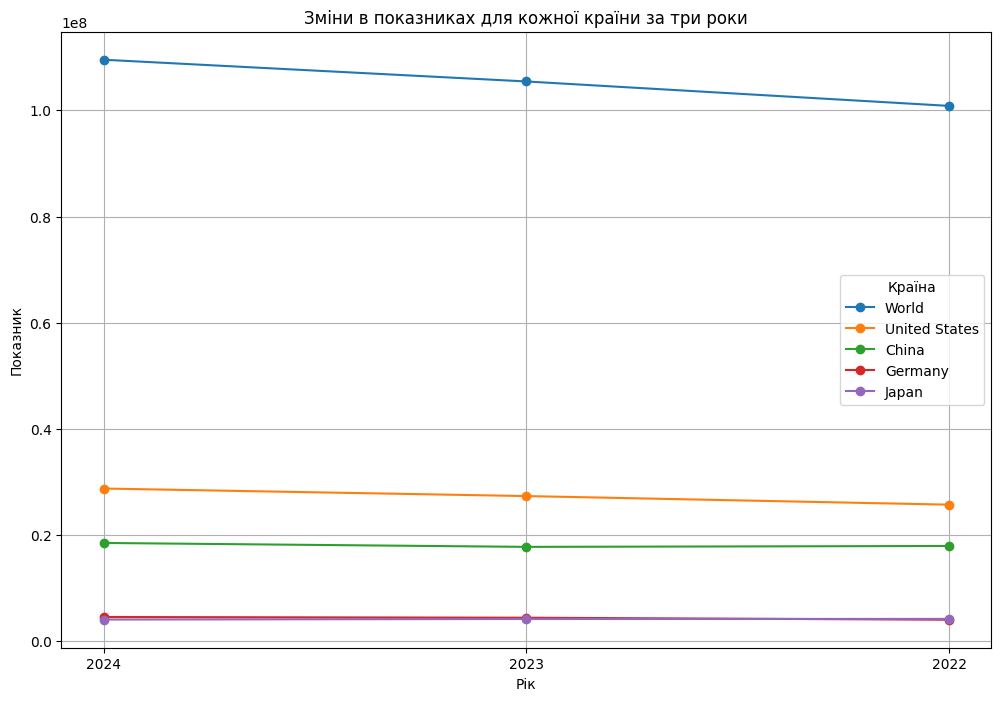

In [15]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#1. Вивести перших 5 рядків.
file_path='/content/drive/My Drive/titanic.csv'
df=pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,Kelly,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,Wilkes,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,Myles,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,Wirz,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
#2. Визначити розмір датасета.
df.shape

(418, 12)

In [38]:
#3. Визначити тип даних
print("\nТипи даних:\n", df.dtypes)


Типи даних:
 PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [39]:
#4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [40]:
#5. Ще раз перевірити наявність пропущених значень.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [41]:
#6. Перевірити наявність дублікатів. При наявності видалити дублікати.
print(f"Кількість дублікатів: {df.duplicated().sum()}")

Кількість дублікатів: 0


In [44]:
#7. Вивести описову статистику датасету describe()
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#8. Видалити стовпчик Cabin
df.drop('Cabin',axis=1,inplace=True)

In [46]:
#9. Сформувати датасет з обраними стовпцями:['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
892,3,Kelly,male,34.5,7.8292
893,3,Wilkes,female,47.0,7.0000
894,2,Myles,male,62.0,9.6875
895,3,Wirz,male,27.0,8.6625
896,3,Hirvonen,female,22.0,12.2875


In [48]:
#10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)

df.dtypes

<ipython-input-48-6f0150392084>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)


,0
Survived,int64
Pclass,object
Sex,int64
Age,float64
Fare,float64


In [49]:
#11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
Fare,1


In [50]:
#12.Вивести 5 перших рядків датасету.
df.head(5)

,Survived,Pclass,Sex,Age,Fare
892,3,Kelly,0,34.5,7.8292
893,3,Wilkes,1,47.0,7.0000
894,2,Myles,0,62.0,9.6875
895,3,Wirz,0,27.0,8.6625
896,3,Hirvonen,1,22.0,12.2875


In [51]:
#13.Вивести 5 останніх рядків датасету.
df.tail(5)

,Survived,Pclass,Sex,Age,Fare
1305,3,Spector,0,NaN,8.0500
1306,1,Oliva y Ocana,1,39.0,108.9000
1307,3,Saether,0,38.5,7.2500
1308,3,Ware,0,NaN,8.0500
1309,3,Peter,0,NaN,22.3583


In [53]:
#14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print(survival_rate_by_gender)

Sex
0    233.458647
1    214.473684
Name: Survived, dtype: float64


In [55]:
#15.Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?
# Обчислення відсотка виживання для кожного класу
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100

# Вивід результату
print("Відсоток виживання залежно від класу:")
print(survival_rate_by_class)

# Визначення класу з найвищим рівнем виживання
highest_survival_class = survival_rate_by_class.idxmax()
highest_survival_rate = survival_rate_by_class.max()

print(f"Клас {highest_survival_class} мав найвищий рівень виживання: {highest_survival_rate:.2f}%")


Відсоток виживання залежно від класу:
Pclass
Abbott            300.0
Abelseth          300.0
Abrahamsson       300.0
Abrahim           300.0
Aks               300.0
                  ...  
Zakarian          300.0
de Brito          200.0
de Messemaeker    300.0
del Carlo         200.0
van Billiard      300.0
Name: Survived, Length: 352, dtype: float64
Клас Abbott мав найвищий рівень виживання: 300.00%
